# ECON320-L Python Assignment 1: James (Minkyu) Song 

###    
<h1 style="text-align: center; color: purple;" markdown="1">Econ 320 Python Assignment 1 </h1>

<h2 style="text-align: center; color: #012169" markdown="1">Topic</h2>


In [1]:
# Script name: Econ320LabAss1_james_song.ipynb
# Purpose of script: Python Assignment 1 of ECON320L with Professor Paloma Lopez de mesa Moyano
# Author: James (Minkyu) Song
# Date Created: September 30th 2022
# --------------------------
# Notes: NA
# ---------------------------

**The package set up**

In [2]:

# import package os to find the path of your working directory
import wooldridge as wool
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats as stats
from scipy.optimize import minimize


# Effects of education on wages
 
Download the [PSID 1982 dataset](https://www.wiley.com/legacy/wileychi/baltagi/supp/WAGES.xls) and save as a CSV. This is cross-sectional data originating from the [Panel Study on Income Dynamics](https://psidonline.isr.umich.edu/), 1982. In this assignment, we will use this data to investigate the effect of eduction on wages for this population. 

Let's first investigate our data and a few relationships in it. This is a little of what I call the "motivation" part of your regression analysis. This is very simple- you will have to do more involved things in your final project. 

* First, Google PSID1982 to see what each variable means. Find the path of where you save this data set in your computer and import it into your Jupyter notebook.

In [3]:
import csv 
file_dir = r"C:\Users\Lenovo\Desktop\college_work\ECON320_lab\03_datasets\PSID1982.csv"
PSID1982 = pd.read_csv(file_dir)
PSID1982.head()

,Unnamed: 0,experience,weeks,occupation,industry,south,smsa,married,gender,union,education,ethnicity,wage
0,1,9,32,white,yes,yes,no,yes,male,no,9,other,515
1,2,36,30,blue,yes,no,no,yes,male,no,11,other,912
2,3,12,46,blue,yes,no,no,no,male,yes,12,other,954
3,4,37,46,blue,no,no,yes,no,female,no,10,afam,751
4,5,16,49,white,no,no,no,yes,male,no,16,other,1474


In [4]:
PSID1982.describe().apply(lambda x: round(x,2))

,Unnamed: 0,experience,weeks,education,wage
count,595.00,595.00,595.00,595.00,595.00
mean,298.00,22.85,46.45,12.85,1148.04
std,171.91,10.79,5.19,2.79,531.08
min,1.00,7.00,5.00,4.00,292.00
25%,149.50,13.00,46.00,12.00,800.00
50%,298.00,21.00,48.00,12.00,1080.00
75%,446.50,32.00,49.00,16.00,1350.00
max,595.00,51.00,52.00,17.00,5100.00



* Then create two tables to show the proportion of women and men in the dataset and the proportion of people that reside in a standard metropolitan statistical area. 

In [5]:
table1_pd = PSID1982['gender'].value_counts() #use .value_counts() for freq table
print(f'freq table: \n{table1_pd}\n')
print(f'Proportion table: \n{table1_pd/table1_pd.sum()}\n') #proportion is just divided by the sum of each


freq table: 
male      528
female     67
Name: gender, dtype: int64

Proportion table: 
male      0.887395
female    0.112605
Name: gender, dtype: float64



In [6]:
table2_pd = PSID1982['smsa'].value_counts() #use .value_counts() for freq table
print(f'freq table: \n{table2_pd}\n')
print(f'freq table: \n{table2_pd/table2_pd.sum()}\n') #proportion is just divided by the sum of each

freq table: 
yes    382
no     213
Name: smsa, dtype: int64

freq table: 
yes    0.642017
no     0.357983
Name: smsa, dtype: float64



## Let's add a cross table 


* Create a third table, the cross reference table for these two variables.  

In [7]:
crosstab = pd.crosstab(PSID1982['gender'], PSID1982['smsa'], normalize=True) #cross table between two variables and normalize by divide all values by the sum of values.
crosstab

smsa,no,yes
gender,,
female,0.023529,0.089076
male,0.334454,0.552941


* The following table looks at the correlation table between wages education and experience. 
* What can you say about this correlations? Do they have the expected sign?

In [8]:
# load data named <dataset> and save it in an object with the same name
cormat = PSID1982[['wage','education', 'experience']] # column headers we want
cormat.corr().round(decimals=3)

# we can say that wage v education is more positively correlated than wage v experience
# These correlations seem to have the expected sign. 
# note that education and experience are negatively correlated because the more education one has means less expereience and vice versa.

,wage,education,experience
wage,1.000,0.441,0.090
education,0.441,1.000,-0.222
experience,0.090,-0.222,1.000


## Find averages of relevant variables and some statistics by gender


1. Look at the averages for the whole sample for wage, education, and experience

2. Calculate the above averages, now separated by gender. Add the correlation between wage and education by gender.  


* What can you say about these results? 

* What can you say about the average values for women vs men? 

In [9]:
eductable = PSID1982[['wage','education', 'experience']].mean() #mean table of 3 rows
eductable = pd.DataFrame(round(eductable,3), columns = ["Averages"]) # 
eductable

,Averages
wage,1148.039
education,12.845
experience,22.854


In [10]:
bygender = PSID1982.pivot_table(values=['wage', 'education', 'experience'], index="gender", aggfunc=[np.mean]) # create pivot table, of wage, educ, exp, indexed by gender
gb_gender_corr =PSID1982.groupby('gender')[['wage','education']].corr()  # not sure why this was just left out there without being assigned to a variable in the empty code
bla = gb_gender_corr.iloc[0::2,-1].values[0::1] # better way to code this.
bygender['corrwage_educ'] = bla
bygender

mean                         corrwage_educ
        education experience         wage              
gender                                                 
female  12.835821  20.014925   735.820896      0.670763
male    12.846591  23.214015  1200.346591      0.449465

In [11]:
# We see that although education mean for female and male are similar, 
# We should be concerned that there are other unexplained factors for why male wage is higher.
# Although men tend to have more experience, we would defineitely need to do more analysis to say with confidence that
# the 400+ difference only comes from the difference of exeprience 

# Graphs 

Let's look at those numbers using graphs. 

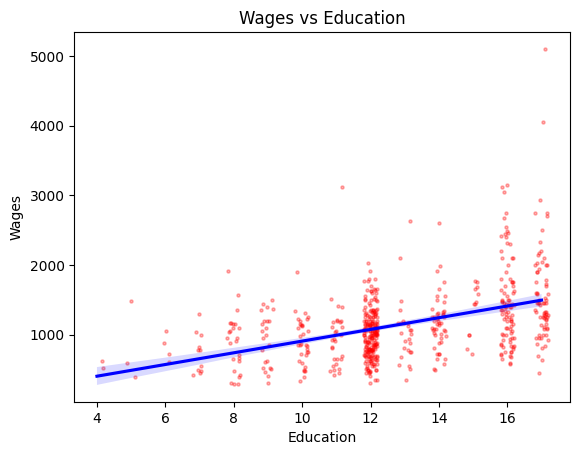

In [12]:
# use line_kws= {'color':'blue'} to change color of the line
# scatter_kws={'color':'red', 's':5} to change color and size of dots

sns.regplot(x="education", y="wage", data=PSID1982,line_kws= {'color':'blue'},marker='o',
           scatter_kws={'color':'red', 's':5, 'alpha':0.3}, x_jitter = 0.2).set(title= 'Wages vs Education',
                                                  xlabel="Education", ylabel = "Wages");


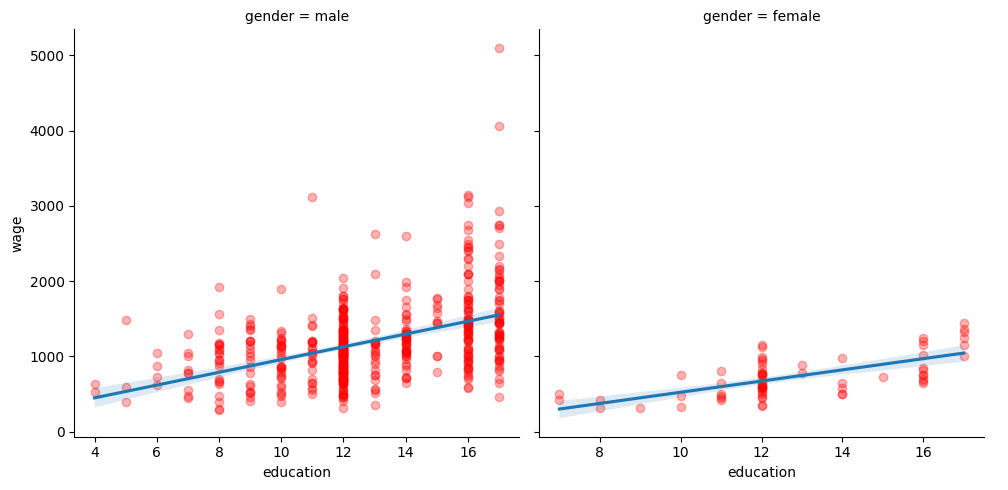

In [13]:
sns.lmplot(x='education', y='wage', col='gender', scatter_kws={'color':'red','alpha':0.3}, 
            facet_kws= {"sharex": False}, data=PSID1982).add_legend()

# Simple regression analysis

Now let's use the data to estimate the following equation
$$ wage = \beta_0 + \beta_1*education + u $$

Estimate this equation using the step by step method learned last class, the method that minimizes SSR and the variance covarance method. (3 ways first)

### Equation system results: step-by-step

In [15]:
y= PSID1982['wage']
x= PSID1982['education']
datas = pd.DataFrame({'x': x, 'y': y})
#what we've been doing for the past few weeks
# ingredients to the OLS formulas:
x_bar = np.mean(x) 
y_bar = np.mean(y)

sumy = np.sum(y)
# use xbar ybar instead of typing out np.mean(x), np.mean(y) over and over again
sumxy = np.sum((x-x_bar)*(y - y_bar))
sumx2 = np.sum((x-x_bar)**2)
sumy2 = np.sum((y-y_bar)**2)



# manual calculation of OLS coefficients:
b1 = sumxy/sumx2
b0 = y_bar - b1 * x_bar

print(f'b1: {b1}\n')
print(f'b0: {b0}\n')

b1: 83.88785655141531

b0: 70.4674157605591



### Function minimization results 


In [16]:
#Create initial values for the Beta parameters
b = np.array([0, 0]) # initial set to 0

#create a column of constants
k= np.ones(len(x)) 

# Create function for Sum of square residuals (SSR)
def sse(b, y, x, k):
    return np.sum((y - b[0] * k - b[1] * x)**2)

#Use minimize from scipy.optimize to find the parameters beta that minimize the SSR
resa = minimize(fun = sse, x0 = b, args = (y, x, k), )

# print results
print(resa['x'])

[70.46928373 83.88773191]


### Covariance , variance method
Using the `np.cov(x,y)` and `np.var(x)` functions in Python calculate the $\hat\beta_0, \hat\beta_1$ based on the equation below.
$$\hat\beta_1=\frac{Cov(x,y)}{Var(x)}$$ 
$$\hat\beta_0 = \bar{y} - \hat\beta_1 \bar{x}$$

In [17]:
# ingredients to the OLS formulas:
cov_xy = np.cov(x, y)[1,0]  # access 2. row and 1. column of covariance matrix
var_x = np.var(x, ddof= 1)

# manual calculation of OLS coefficients:
b1 = cov_xy / var_x
b0 = y_bar - b1 * x_bar
print(f'b1: {b1}\n')
print(f'b0: {b0}\n')

b1: 83.8878565514153

b0: 70.46741576055933



### `ols()` command 

Finally use the `ols()` command to estimate save your estimation in an object called reg and show the summary of your model. 
$$ log(wage) = \beta_0 + \beta_1*education + u $$
What can you say about this new results why is it better to use $log(wages)$?
What is your interpretation of the coeficients and the $R^2$?

In [18]:
# estimate log-level model:

# Put all vectors into a data frame to work with it later 
# and becasue you need that format for the graphs
data = {'y': np.log(y), 'x': x}

datas = pd.DataFrame(data = data)
reg =smf.ols(formula = 'y ~ x', data= datas)
results = reg.fit()

# print results using summary:
print(f'results.summary(): \n{results.summary()}\n')

# the log(wages) is better than absolute wages because it allows us to account effect of the percentage change in education.
# this shows that the b_1 (education) coefficient on wage is 0.0717. This shows that when the wage is log-leveled, the correlation drops significatnyl. 
# The R^2 value of 0.207 is not a high value, this means only about 20% of the variation is explained and 80% is unexplained.

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     156.2
Date:                Fri, 30 Sep 2022   Prob (F-statistic):           5.64e-32
Time:                        18:15:28   Log-Likelihood:                -283.58
No. Observations:                 595   AIC:                             571.2
Df Residuals:                     593   BIC:                             579.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0292      0.075

<style>
div.gray { background-color:#dbdbdb; border-radius: 5px; padding: 20px;}
</style>
<div class = "gray">

**Packages used in this document**

`wooldridge`
`matplot.lib`
`pandas`
`numpy` 
`seaborn`
`statsmodels`
`scipy`
    

</div>

&nbsp;
<hr />
<p style="font-family:palatino; text-align: center;font-size: 15px">ECON320 Python Programming Laboratory</a></p>
<p style="font-family:palatino; text-align: center;font-size: 15px">Professor <em> Paloma Lopez de mesa Moyano</em></a></p>
<p style="font-family:palatino; text-align: center;font-size: 15px"><span style="color: #6666FF;"><em>paloma.moyano@emory.edu</em></span></p>

<p style="font-family:palatino; text-align: center;font-size: 15px">Department of Economics</a></p>
<p style="font-family:palatino; text-align: center; color: #012169;font-size: 15px">Emory University</a></p>


&nbsp;

In [ ]:
# !jupyter nbconvert --to html nameoffile.ipynb